<a href="https://colab.research.google.com/github/kapuskaFaizan/ML-python-notebooks/blob/master/adult_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#remove these two lines of code for local use

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy
import sklearn
import matplotlib.pyplot as plt

In [ ]:
# write the location of data here 

d = pd.read_csv("/content/drive/My Drive/adult.data", sep = "," , header = None)
info = d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
d.to_csv('/content/drive/My Drive/data.csv')

In [ ]:
ccc= pd.read_csv('/content/drive/My Drive/data.csv')

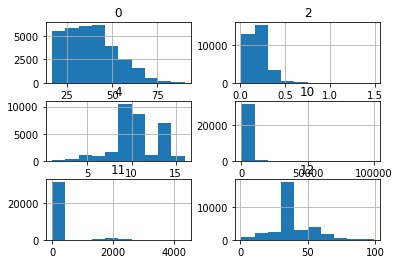

In [ ]:
from matplotlib import pyplot
num_ix = d.select_dtypes(include=['int64', 'float64']).columns

subset = d[num_ix]

subset.hist()
pyplot.show()

In [ ]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
d.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [ ]:
d.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
d.isnull().values.any()

False

In [ ]:
d.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:

d.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
d["Income"] = d["Income"].map({ " <=50K": -1, " >50K": 1 })

In [ ]:
from IPython.display import display
from numpy.random import RandomState
y_all = d["Income"].values
d.drop("Income", axis=1, inplace=True,)

In [ ]:
y_all

array([-1, -1, -1, ..., -1, -1,  1])

In [ ]:
d.describe()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
d.CapitalGain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: CapitalGain, Length: 119, dtype: int64

In [ ]:
d.CapitalLoss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: CapitalLoss, Length: 92, dtype: int64

In [ ]:
d.drop("CapitalGain", axis=1, inplace=True,)
d.drop("CapitalLoss", axis=1, inplace=True,)

In [ ]:
d.Age = d.Age.astype(float)
d.fnlwgt = d.fnlwgt.astype(float)
d.EducationNum = d.EducationNum.astype(float)
d.HoursPerWeek = d.HoursPerWeek.astype(float)

In [ ]:
d.WorkClass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
d.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
d.MaritalStatus.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
d.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
d.Relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
d.Gender.unique()

array([' Male', ' Female'], dtype=object)

In [ ]:
d.NativeCountry.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
len(d.NativeCountry.unique())

42

In [ ]:
d = pd.get_dummies(d, columns=[
    "WorkClass", "Education", "MaritalStatus", "Occupation", "Relationship",
    "Race", "Gender", "NativeCountry",
])

In [ ]:
pd.value_counts(pd.Series(y_all))

-1    24720
 1     7841
dtype: int64

In [ ]:
d.shape

(32561, 106)

In [ ]:
pd.value_counts(pd.Series(y_all))

-1    24720
 1     7841
dtype: int64

In [ ]:
da = d.iloc[:,0:20]
daa = d.iloc[:,20:50]
daaa = d.iloc[:,50:70]
d1 = d.iloc[:,70:90]

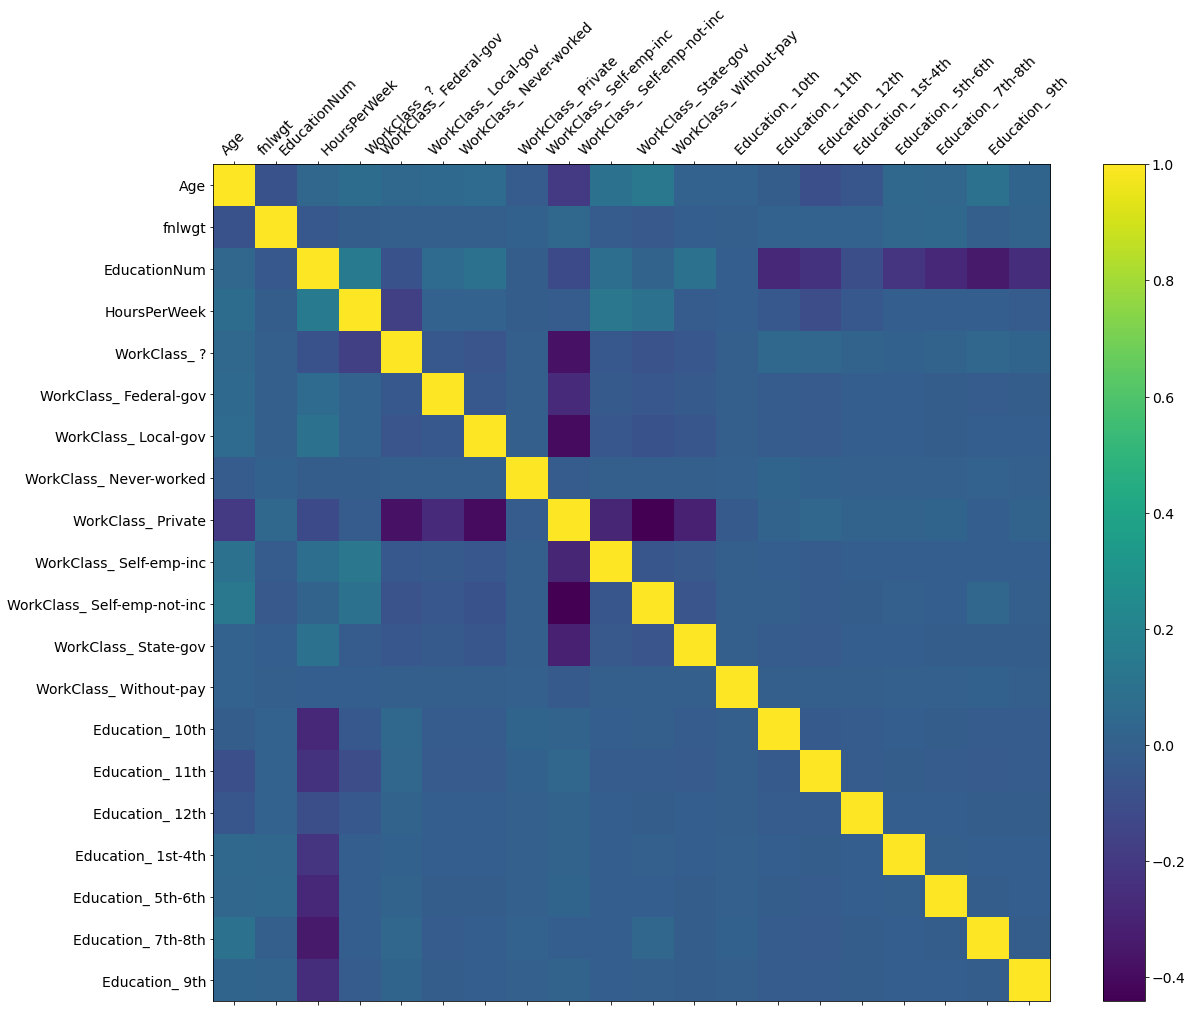

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(da.corr(), fignum=f.number)
plt.xticks(range(da.shape[1]), da.columns, fontsize=14, rotation=45)
plt.yticks(range(da.shape[1]), da.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

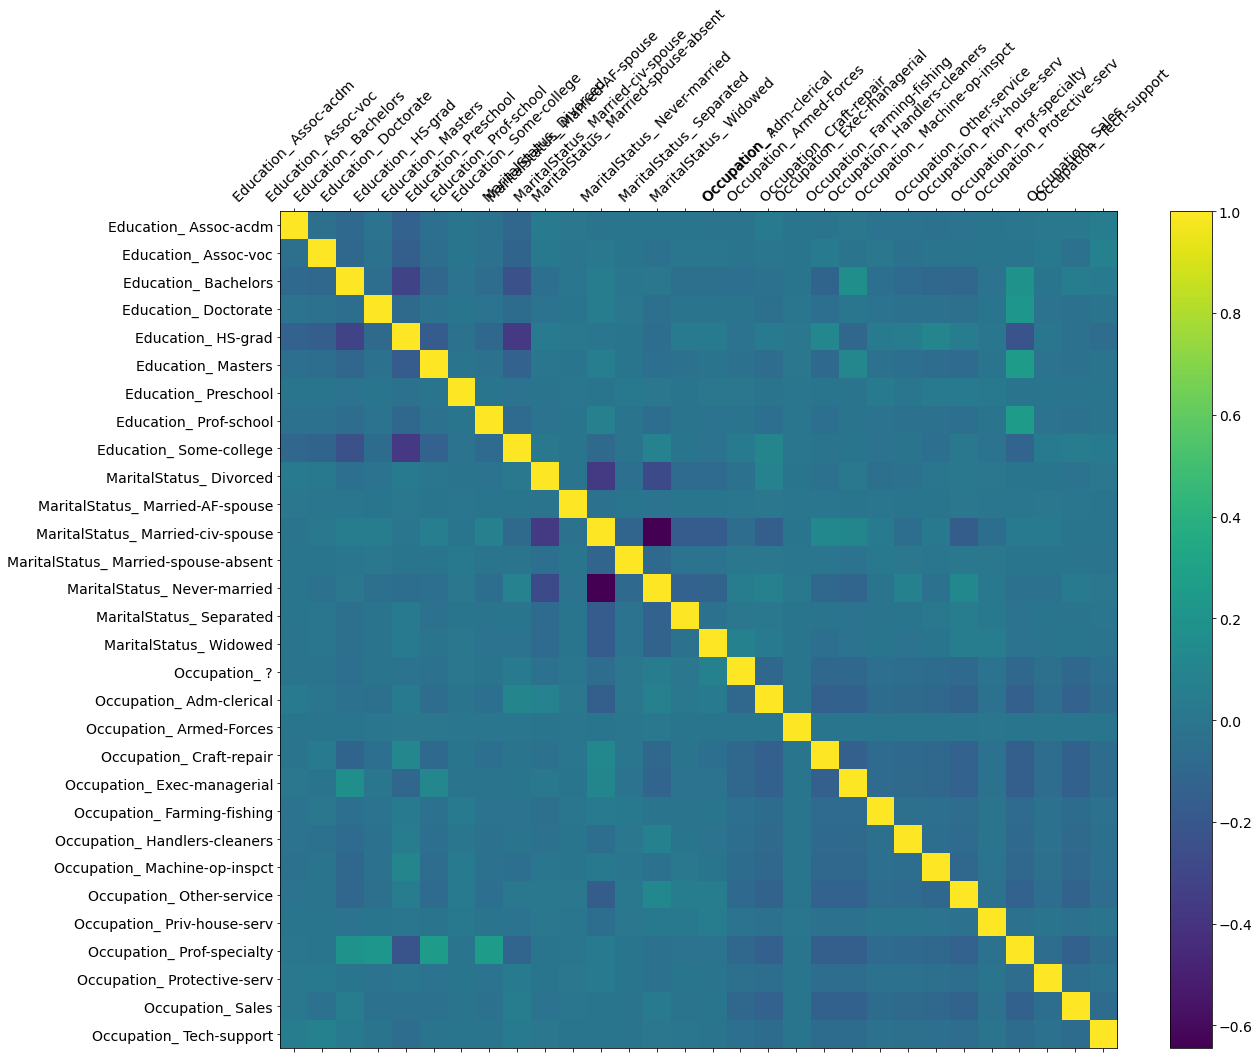

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(daa.corr(), fignum=f.number)
plt.xticks(range(daa.shape[1]), daa.columns, fontsize=14, rotation=45)
plt.yticks(range(daa.shape[1]), daa.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

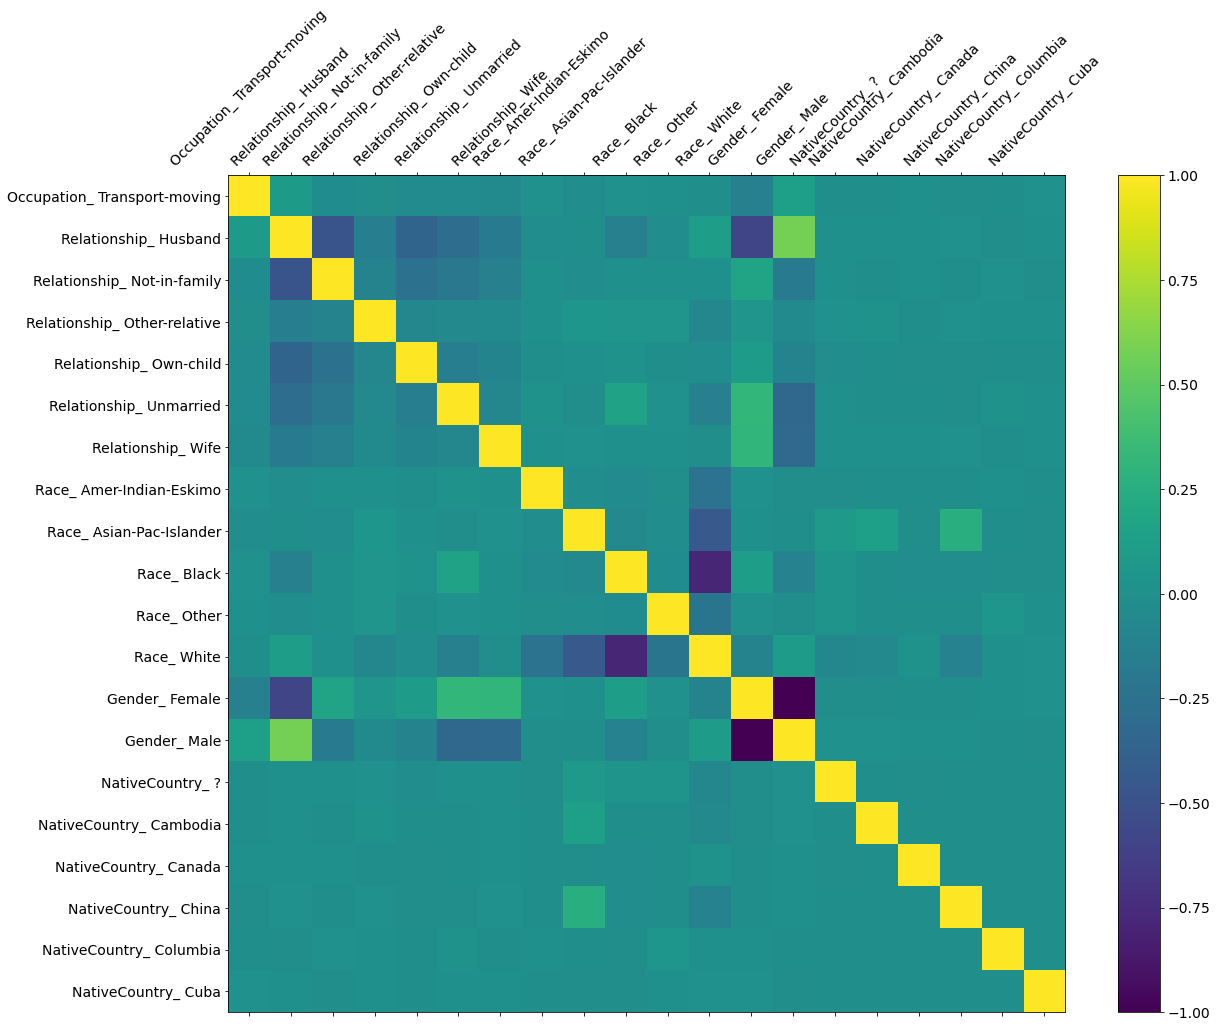

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(daaa.corr(), fignum=f.number)
plt.xticks(range(daaa.shape[1]), daaa.columns, fontsize=14, rotation=45)
plt.yticks(range(daaa.shape[1]), daaa.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

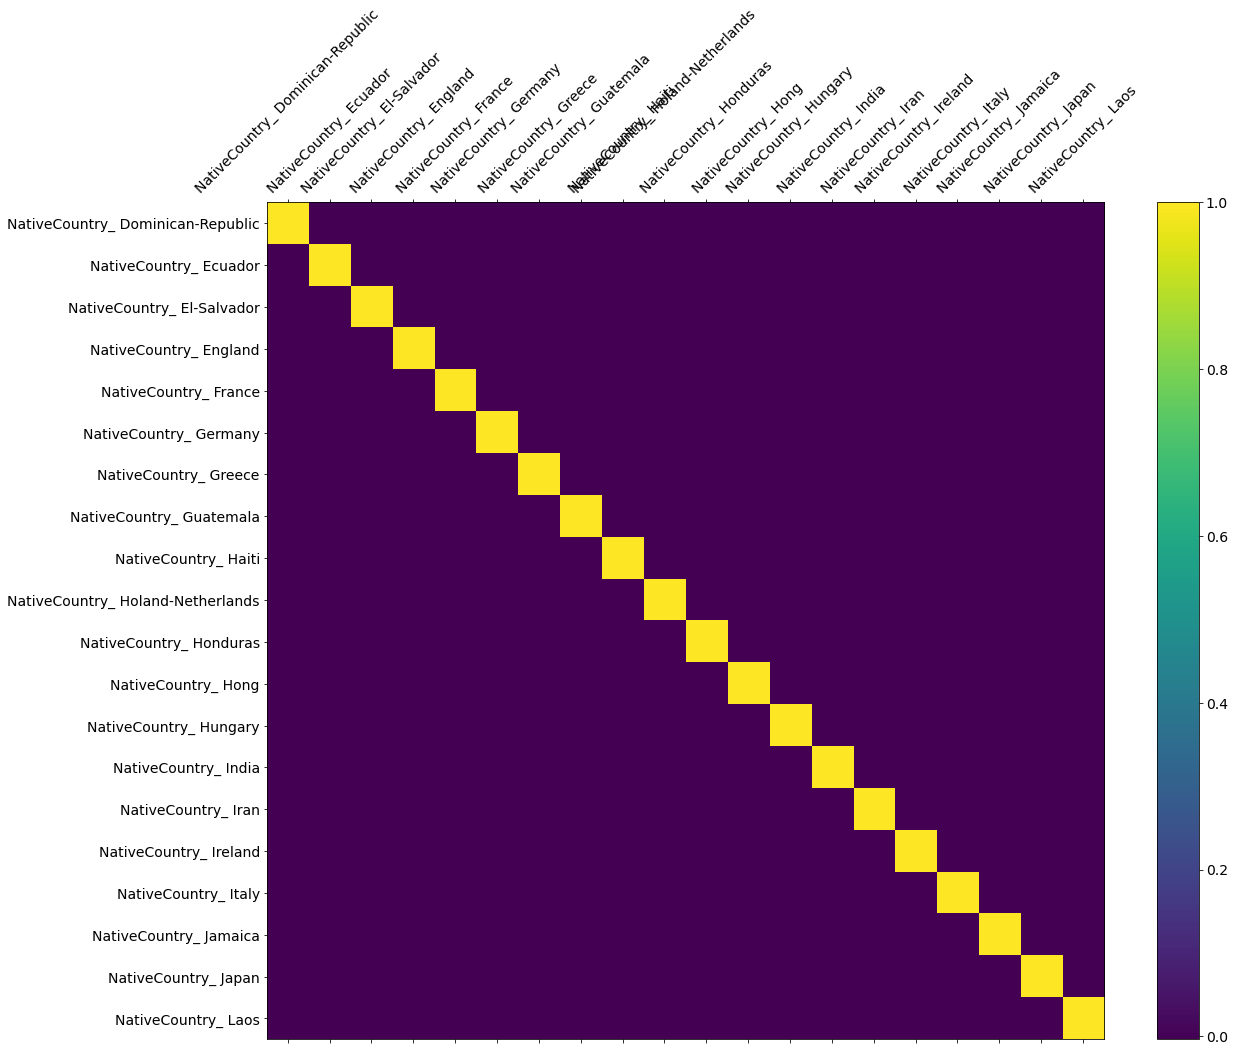

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(d1.corr(), fignum=f.number)
plt.xticks(range(d1.shape[1]), d1.columns, fontsize=14, rotation=45)
plt.yticks(range(d1.shape[1]), d1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [ ]:
from sklearn.model_selection import train_test_split

rs = RandomState(130917)
X_train, X_test, y_train, y_test = train_test_split(d, y_all, test_size=0.25, stratify=y_all,random_state=rs,)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn_pandas import DataFrameMapper
import numpy as np
import pandas as pd

In [ ]:
standard_scaler_cols = ["Age", "fnlwgt", "EducationNum", "HoursPerWeek",]
other_cols = list(set(d.columns) - set(standard_scaler_cols))
mapper = DataFrameMapper([([col,], StandardScaler(),) for col in standard_scaler_cols] +[(col, None,) for col in other_cols])

In [ ]:
clf = LogisticRegression(random_state=rs,)
pipeline = Pipeline([("scale", mapper,),("logit", clf,)])

In [ ]:
strat_kfold = StratifiedKFold(10, random_state=rs,)
estimator = GridSearchCV(
    pipeline,
    param_grid={
        "logit__C": np.power(10, np.arange(-4.0, 5.0)),
        "logit__class_weight": ["balanced", None,],
    },
    scoring=make_scorer(roc_auc_score),
    cv=strat_kfold,
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
import warnings

warnings.filterwarnings("ignore")
estimator.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x7F85D0415678, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        DataFrameMapper(default=False,
                                                        df_out=False,
                                                        features=[(['Age'],
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  (['fnlwgt'],
                                                                   StandardScaler(copy=True,
                                                                           

In [ ]:
cv_results_df = pd.DataFrame(estimator.cv_results_)
cv_results_df.sort_values(by="rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logit__C,param_logit__class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
6,0.640459,0.018497,0.015627,0.000559,0.1,balanced,"{'logit__C': 0.1, 'logit__class_weight': 'bala...",0.820716,0.804994,0.797630,0.808976,0.802319,0.821775,0.821817,0.806073,0.814620,0.830828,0.812975,0.010066,1
16,0.613375,0.025108,0.015560,0.000326,10000,balanced,"{'logit__C': 10000.0, 'logit__class_weight': '...",0.817771,0.804766,0.798398,0.807504,0.803668,0.820116,0.820966,0.805492,0.814890,0.832256,0.812583,0.009819,2
10,0.623814,0.018526,0.015470,0.000291,10,balanced,"{'logit__C': 10.0, 'logit__class_weight': 'bal...",0.818082,0.804766,0.798668,0.806654,0.803896,0.819805,0.819846,0.806343,0.814620,0.832835,0.812551,0.009766,3
14,0.622189,0.025812,0.015653,0.000584,1000,balanced,"{'logit__C': 1000.0, 'logit__class_weight': 'b...",0.818891,0.804455,0.796738,0.806654,0.802817,0.820386,0.820697,0.806032,0.814620,0.832565,0.812386,0.010296,4
12,0.634148,0.015555,0.015585,0.000552,100,balanced,"{'logit__C': 100.0, 'logit__class_weight': 'ba...",0.818580,0.803915,0.797547,0.806654,0.803626,0.819805,0.820427,0.806073,0.814351,0.832835,0.812381,0.010107,5


In [ ]:
print(estimator.best_params_)

{'logit__C': 0.1, 'logit__class_weight': 'balanced'}


In [ ]:
def _build_df_from_confusion_matrix(confusion_matrix, as_fractions=False):
    if as_fractions:
        x = np.array(confusion_matrix)
        x = np.apply_along_axis(
            lambda row: [
                row[0] / (row[0] + row[1]),
                row[1] / (row[0] + row[1])
            ],
            1,
            x
        )
    else:
        x = confusion_matrix
    df = pd.DataFrame(
        x,
        index=["<= 50K", "> 50K"],
        columns=["<= 50K", "> 50K"]
        )
    df.index.names = ["Actual"]
    df.columns.names = ["Predicted"]
    return df

In [ ]:
y_train_predicted = estimator.predict(X_train)

print("Training set accuracy score: {}".format(accuracy_score(y_train, y_train_predicted)))
print("Training set AUROC score: {}".format(estimator.score(X_train, y_train)))
print("\nConfusion matrix for training set:")



Training set accuracy score: 0.7944307944307945
Training set AUROC score: 0.8148033705770559

Confusion matrix for training set:


In [ ]:
training_confusion_matrix = confusion_matrix(y_train, y_train_predicted)
display(_build_df_from_confusion_matrix(training_confusion_matrix))

print("Same as above but in fractions:")

Predicted,<= 50K,> 50K
Actual,,
<= 50K,14377,4162
> 50K,858,5023


Same as above but in fractions:


In [ ]:
display(_build_df_from_confusion_matrix(training_confusion_matrix, as_fractions=True))

print("Precision, recall, f-score:")

precision_recall_fscore_support(y_train, y_train_predicted)

Predicted,<= 50K,> 50K
Actual,,
<= 50K,0.775500,0.224500
> 50K,0.145894,0.854106


Precision, recall, f-score:


(array([0.94368231, 0.5468699 ]),
 array([0.7755003 , 0.85410644]),
 array([0.85136496, 0.66679942]),
 array([18539,  5881]))

In [ ]:
y_test_predicted = estimator.predict(X_test)

print("Test set accuracy score: {}".format(accuracy_score(y_test, y_test_predicted)))
print("Test set AUROC score: {}".format(estimator.score(X_test, y_test)))


Test set accuracy score: 0.7860213732956639
Test set AUROC score: 0.802988998543925

Confusion matrix for test set:


In [ ]:
test_confusion_matrix = confusion_matrix(y_test, y_test_predicted)
display(_build_df_from_confusion_matrix(test_confusion_matrix))

print("Same as above but in fractions:")

display(_build_df_from_confusion_matrix(test_confusion_matrix, as_fractions=True))

print("Precision, recall, f-score:")
print("\nConfusion matrix for test set:")
precision_recall_fscore_support(y_test, y_test_predicted)

Predicted,<= 50K,> 50K
Actual,,
<= 50K,4761,1420
> 50K,322,1638


Same as above but in fractions:


Predicted,<= 50K,> 50K
Actual,,
<= 50K,0.770264,0.229736
> 50K,0.164286,0.835714


Precision, recall, f-score:


(array([0.93665158, 0.53564421]),
 array([0.77026371, 0.83571429]),
 array([0.84534801, 0.65284974]),
 array([6181, 1960]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(d, y_all, test_size=0.20)


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state = seed)

estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

print(results.mean())

0.758791214461142


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(d, y_all, test_size=0.40)


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state = seed)

estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

print(results.mean())



0.7620307785675766


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(d, y_all, test_size=0.50)


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state = seed)

estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)

print(results.mean())

0.7570024570024569
